In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from google.colab import drive
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.output import eval_js
from base64 import b64decode

In [ ]:
drive.mount('/content/drive')

# Path to augmented dataset
aug_dir = '/content/drive/MyDrive/augmented/'
assert os.path.exists(aug_dir), "Augmented folder not found!"
print("Folders inside:", os.listdir(aug_dir))

Mounted at /content/drive
Folders inside: ['Tonmoy', 'Rohan', 'Anirudha', 'Niloy', 'Anik']


In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    aug_dir,
    target_size=(227,227),
    batch_size=32,
    class_mode='sparse',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    aug_dir,
    target_size=(227,227),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

Found 600 images belonging to 5 classes.
Found 150 images belonging to 5 classes.


In [ ]:
model = models.Sequential([
    layers.Input(shape=(227,227,3)),

    layers.Conv2D(96, (11,11), strides=(4,4), padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    layers.BatchNormalization(),

    layers.Conv2D(256, (5,5), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    layers.BatchNormalization(),

    layers.Conv2D(384, (3,3), padding='same', activation='relu'),
    layers.Conv2D(384, (3,3), padding='same', activation='relu'),
    layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 27, 27, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4096)           │        16,384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 4096)           │        16,384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │        20,485 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,337,029 (222.54 MB)

 Trainable params: 58,319,429 (222.47 MB)

 Non-trainable params: 17,600 (68.75 KB)

In [ ]:
history = model.fit(train_generator,validation_data=val_generator,epochs=21)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/21
19/19 ━━━━━━━━━━━━━━━━━━━━ 218s 11s/step - accuracy: 0.3620 - loss: 1.8899 - val_accuracy: 0.1600 - val_loss: 1.6411
Epoch 2/21
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - accuracy: 0.6936 - loss: 0.8174 - val_accuracy: 0.1600 - val_loss: 1.8666
Epoch 3/21
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 241ms/step - accuracy: 0.8395 - loss: 0.4050 - val_accuracy: 0.1600 - val_loss: 2.8539
Epoch 4/21
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 235ms/step - accuracy: 0.8860 - loss: 0.2815 - val_accuracy: 0.3600 - val_loss: 2.0417
Epoch 5/21
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 218ms/step - accuracy: 0.9143 - loss: 0.2542 - val_accuracy: 0.5533 - val_loss: 1.9481
Epoch 6/21
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 218ms/step - accuracy: 0.9460 - loss: 0.1511 - val_accuracy: 0.5600 - val_loss: 2.0895
Epoch 7/21
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 236ms/step - accuracy: 0.9369 - loss: 0.1577 - val_accuracy: 0.5067 - val_loss: 2.7609
Epoch 8/21
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - accuracy: 0.9745 - loss: 0.0886 - val_accuracy: 0.

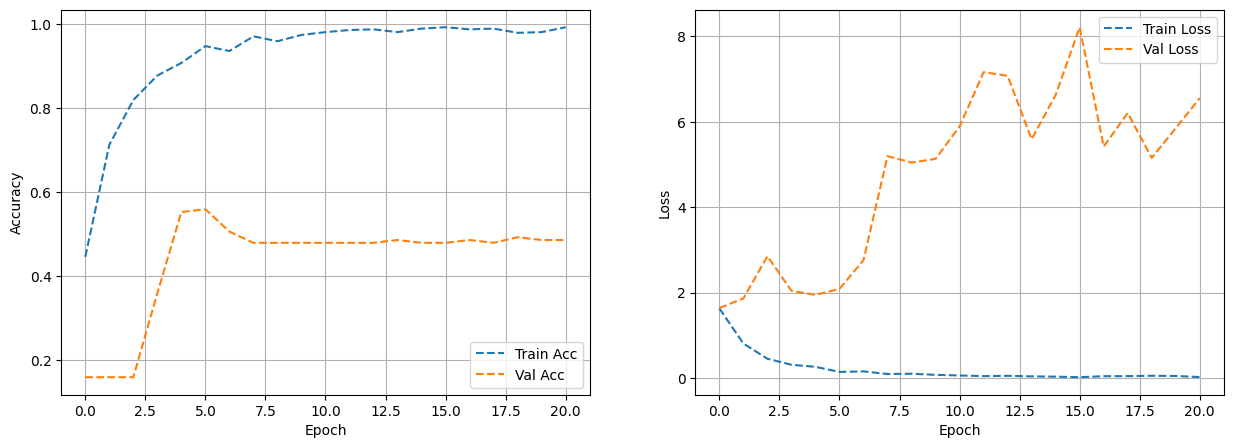

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], '--', label='Train Acc')
plt.plot(history.history['val_accuracy'], '--', label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], '--', label='Train Loss')
plt.plot(history.history['val_loss'], '--', label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

Saved capture as capture.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


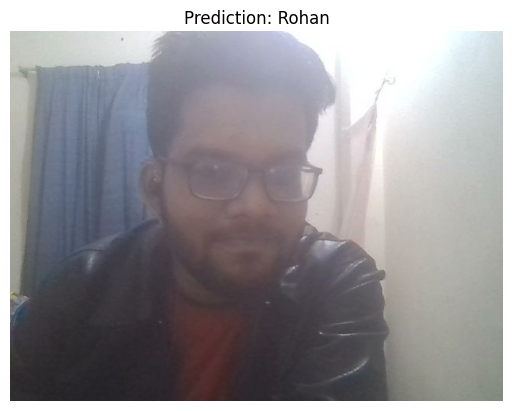

In [ ]:
def capture_image(filename='capture.jpg'):
    js = """
    async function takePhoto() {
      const div = document.createElement('div');
      const video = document.createElement('video');
      const button = document.createElement('button');
      button.textContent = 'Capture';
      div.appendChild(video);
      div.appendChild(button);
      document.body.appendChild(div);
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      video.srcObject = stream;
      await video.play();

      await new Promise((resolve) => button.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getTracks().forEach(track => track.stop());
      div.remove();
      return canvas.toDataURL('image/jpeg', 0.8);
    }
    takePhoto();
    """
    data = eval_js(js)
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    print(f"Saved capture as {filename}")

def predict_image(filename='capture.jpg'):
    img = cv2.imread(filename)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (227,227))
    img_input = img_resized.astype('float32') / 255.0
    img_input = np.expand_dims(img_input, axis=0)

    pred = model.predict(img_input)
    class_idx = np.argmax(pred)
    class_label = list(train_generator.class_indices.keys())[class_idx]

    plt.imshow(img_rgb)
    plt.title(f"Prediction: {class_label}")
    plt.axis('off')
    plt.show()


capture_image()
predict_image()